In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import set_matplotlib_hangul
%matplotlib inline

import tensorflow as tf
import os
import PIL
import shutil

os.getcwd()
path = os.getcwd() #주피터 노트북 파일 경로
base_dir = path+'\\CNN'

validation_dir = os.path.join(base_dir+'\\validation')
train_dir = os.path.join(base_dir+'\\train')
test_dir = os.path.join(base_dir+'\\test')

# 훈련용 O/X 이미지 경로
train_o_dir = os.path.join(train_dir+ '\\trainO')
train_x_dir = os.path.join(train_dir+ '\\trainX')
train___dir = os.path.join(train_dir+ '\\train_')
print(train_o_dir, train_x_dir)

# 테스트용 O/X 이미지 경로
test_o_dir = os.path.join(test_dir+ '\\testO')
test_x_dir = os.path.join(test_dir+ '\\testX')
test___dir = os.path.join(test_dir+ '\\test_')
print(test_o_dir, test_x_dir)

# 검증용 O/X 이미지 경로
validation_o_dir = os.path.join(validation_dir+'\\validationO')
validation_x_dir = os.path.join(validation_dir+'\\validationX')
validation___dir = os.path.join(validation_dir+'\\validation_')
print(validation_o_dir, validation_x_dir)


C:\Users\Happy\Desktop\professor_kim\CNN\CNN\train\trainO C:\Users\Happy\Desktop\professor_kim\CNN\CNN\train\trainX
C:\Users\Happy\Desktop\professor_kim\CNN\CNN\test\testO C:\Users\Happy\Desktop\professor_kim\CNN\CNN\test\testX
C:\Users\Happy\Desktop\professor_kim\CNN\CNN\validation\validationO C:\Users\Happy\Desktop\professor_kim\CNN\CNN\validation\validationX


In [2]:
# 훈련용 이미지 파일 이름 조회
train_o_fnames = os.listdir(train_o_dir)
train_x_fnames = os.listdir(train_x_dir)
train___fnames = os.listdir(train___dir)
print(train_o_fnames)
print(train___fnames)
print(train_x_fnames)

['cnndata1.png', 'cnndata10.png', 'cnndata1001.png', 'cnndata1003.png', 'cnndata1011.png', 'cnndata1016.png', 'cnndata1017.png', 'cnndata1018.png', 'cnndata1022.png', 'cnndata1025.png', 'cnndata1029.png', 'cnndata1030.png', 'cnndata1031.png', 'cnndata1032.png', 'cnndata1033.png', 'cnndata1037.png', 'cnndata1038.png', 'cnndata1039.png', 'cnndata1044.png', 'cnndata1045.png', 'cnndata1046.png', 'cnndata105.png', 'cnndata1060.png', 'cnndata1064.png', 'cnndata1066.png', 'cnndata1073.png', 'cnndata1079.png', 'cnndata1089.png', 'cnndata109.png', 'cnndata1093.png', 'cnndata1094.png', 'cnndata1095.png', 'cnndata1099.png', 'cnndata1101.png', 'cnndata1103.png', 'cnndata1107.png', 'cnndata1109.png', 'cnndata1113.png', 'cnndata1114.png', 'cnndata1115.png', 'cnndata1120.png', 'cnndata1121.png', 'cnndata1124.png', 'cnndata1128.png', 'cnndata1129.png', 'cnndata1130.png', 'cnndata1136.png', 'cnndata1138.png', 'cnndata114.png', 'cnndata1142.png', 'cnndata1144.png', 'cnndata1148.png', 'cnndata1151.png', 

In [3]:
print('Total training o images :', len(os.listdir(train_o_dir)))
print('Total training x images :', len(os.listdir(train_x_dir)))
print('Total training _ images :', len(os.listdir(train___dir)))

print('Total validation o images :', len(os.listdir(validation_o_dir)))
print('Total validation x images :', len(os.listdir(validation_x_dir)))
print('Total validation _ images :', len(os.listdir(validation___dir)))

print('Total test o images :', len(os.listdir(test_o_dir)))
print('Total test x images :', len(os.listdir(test_x_dir)))
print('Total test _ images :', len(os.listdir(test___dir)))

Total training o images : 1410
Total training x images : 605
Total training _ images : 666
Total validation o images : 442
Total validation x images : 181
Total validation _ images : 253
Total test o images : 900
Total test x images : 412
Total test _ images : 393


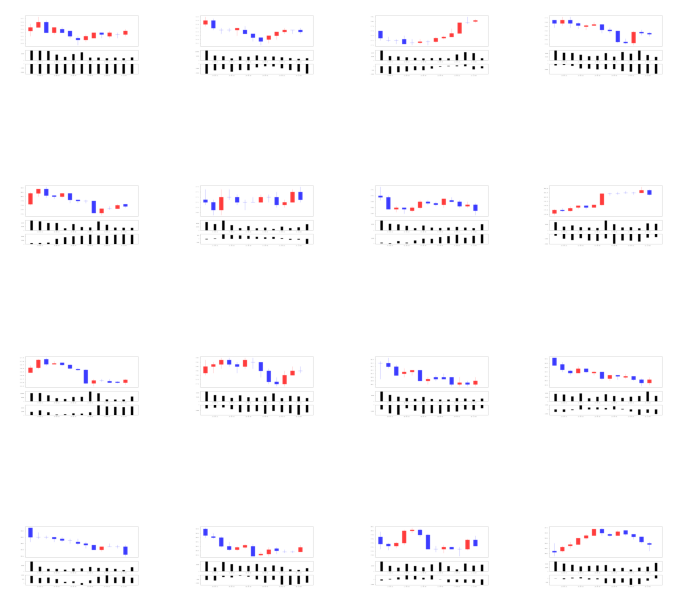

In [4]:
# 이미지 확인
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index += 8

next_o_pix = [os.path.join(train_o_dir, fname) for fname in train_o_fnames[pic_index-8:pic_index]]
next_x_pix = [os.path.join(train_x_dir, fname) for fname in train_x_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_o_pix+next_x_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('OFF')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

In [5]:
# 이미지 데이터 전처리
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image augmentation
# train셋에만 적용
train_datagen = ImageDataGenerator(rescale = 1./255, # 모든 이미지 원소값들을 255로 나누기
#                                    rotation_range=25, # 0~25도 사이에서 임의의 각도로 원본이미지를 회전
#                                    width_shift_range=0.05, # 0.05범위 내에서 임의의 값만큼 임의의 방향으로 좌우 이동
#                                    height_shift_range=0.05, # 0.05범위 내에서 임의의 값만큼 임의의 방향으로 상하 이동
#                                    zoom_range=0.2, # (1-0.2)~(1+0.2) => 0.8~1.2 사이에서 임의의 수치만큼 확대/축소
                                   horizontal_flip=False, # 좌우로 뒤집기                                   
                                   vertical_flip=False,
                                   fill_mode='nearest'
                                  ) 
# validation 및 test 이미지는 augmentation을 적용하지 않는다;
# 모델 성능을 평가할 때에는 이미지 원본을 사용 (rescale만 진행)
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255) 

In [8]:
Batch_Size  = 4

In [9]:
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    batch_size=Batch_Size, # 한번에 변환된 이미지 16개씩 만들어라 라는 것
                                                    color_mode='rgb', # 흑백 이미지 처리
                                                    class_mode='categorical', 
                                                    target_size=(1200,1500)) # target_size에 맞춰서 이미지의 크기가 조절된다
validation_generator = validation_datagen.flow_from_directory(validation_dir, 
                                                              batch_size=Batch_Size, 
                                                              color_mode='rgb',
                                                              class_mode='categorical', 
                                                              target_size=(1200,1500))
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=Batch_Size,
                                                  color_mode='rgb',
                                                  class_mode='categorical',
                                                  target_size=(1200,1500))

Found 2681 images belonging to 3 classes.
Found 876 images belonging to 3 classes.
Found 1705 images belonging to 3 classes.


In [10]:
# class 확인
train_generator.class_indices

{'trainO': 0, 'trainX': 1, 'train_': 2}

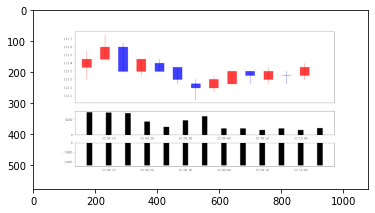

In [11]:
# 이미지 하나 불러오기
sample_img = mpimg.imread(next_o_pix[0])
plt.imshow(sample_img)
plt.show()

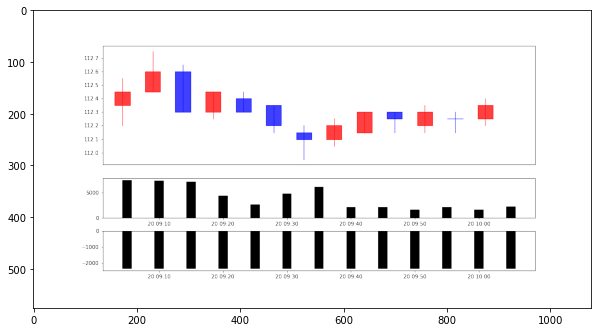

In [12]:
max_iter = 1
cnt = 1
sample_img2 = sample_img[np.newaxis, ...]
# 축을 하나 추가했는데, 하나의 이미지만 바꿔주는게 아니라 동시에 여러개의 이미지를 바꿔줄 수 있기에,
# 그림 개수/장수 까지 받아서 4차원으로 (개수/장수, h, w, channel) 이렇게 받는다
# 쉽게 말해, 받는 형식이 4차원이라서 4차원 형태로 만들어 준것

plt.figure(figsize=(10,10))
for img in train_datagen.flow(sample_img2):
    plt.subplot(1, max_iter, cnt)
    plt.imshow(image.array_to_img(img[0]))
    if cnt == max_iter:
        break
    cnt += 1

In [13]:
1200 * 1500

1800000

In [14]:
# 봉갯수 줄여보고, 구간 3개 정도
from keras.layers import *
from sklearn.metrics import accuracy_score
from tensorflow.keras.activations import elu,gelu,swish,tanh,softmax

model = tf.keras.Sequential()
model.add(Conv2D(128, kernel_size=(3,3), padding='same',input_shape=(1200,1500,3), activation="relu")) # 인풋@ elu 바꾸기
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3),padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(256, kernel_size=(3,3), activation=elu))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation="relu"))

model.add(Dense(32, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1, activation='softmax'))

model.summary() # 신경망의 구조 확인

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1200, 1500, 128)   3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 600, 750, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 600, 750, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 300, 375, 64)     0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 7200000)           0         
                                                                 
 dense (Dense)               (None, 64)                4

In [15]:
from tensorflow.keras.optimizers import RMSprop

# compile() 메서드를 이용해서 손실 함수 (loss function)와 옵티마이저 (optimizer)를 지정
model.compile(optimizer=RMSprop(learning_rate=0.001), # 옵티마이저로는 RMSprop 사용
              loss='categorical_crossentropy', # 손실 함수로 ‘binary_crossentropy’ 사용 # categorical_crossentropy 는 원- 핫 # sparse_categorical_crossentropy는 라벨 값이 int형태
              metrics= ['accuracy'])
# RMSprop (Root Mean Square Propagation) Algorithm: 훈련 과정 중에 학습률을 적절하게 변화시킨다.

In [16]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.callbacks import EarlyStopping

# earlystopping은 (patience 수)n번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
early_stop = EarlyStopping(monitor='val_loss', patience=15) # val_loss  val_accuracy

model_path = path

filename = os.path.join(model_path,'3_class_cnn.h5')

checkpoint = ModelCheckpoint(filename, #filepath
                             monitor='val_loss',#모델 저장시 기준이 되는 값 => val_loss는 loss가 가장 적을 때 저장 # val_loss  val_accuracy
                             verbose=1, # 이게 1 이면 저장되었다고 표시됨
                             save_best_only=True, # True의 경우 학습 중 현 시점 가장 좋은 모델로 저장됨
                             save_weights_only=True, # True의 경우 모델 레이어 및 가중치도 저장됨
#                              save_freq = BATCH_SIZE, # 'epoch'을 사용할 경우, 매 에폭마다 모델이 저장됩니다. integer을 사용할 경우, 숫자만큼의 배치를 진행되면 모델이 저장됩니다.
                             mode='auto'# val_acc 인 경우, 정확도이기 때문에 클수록 좋습니다. 따라서 이때는 max를 입력해줘야합니다. 만약 val_loss 인 경우, loss 값이기 때문에 값이 작을수록 좋습니다. 따라서 이때는 min을 입력해줘야합니다. auto로 할 경우, 모델이 알아서 min, max를 판단하여 모델을 저장합니다.
                            )

In [17]:
# 모델 훈련
history = model.fit_generator(train_generator, # train_generator안에 X값, y값 다 있으니 generator만 주면 된다
                              validation_data=validation_generator, # validatino_generator안에도 검증용 X,y데이터들이 다 있으니 generator로 주면 됨
                              steps_per_epoch=4, # 한 번의 에포크(epoch)에서 훈련에 사용할 배치(batch)의 개수 지정; generator를 4번 부르겠다
                              epochs=100, # 데이터셋을 한 번 훈련하는 과정; epoch은 100 이상은 줘야한다
                              validation_steps=4, # 한 번의 에포크가 끝날 때, 검증에 사용되는 배치(batch)의 개수를 지정; validation_generator를 4번 불러서 나온 이미지들로 작업을 해라
                              verbose=2)
# 참고: validation_steps는 보통 내가 원하는 이미지 수에 flow할 때 지정한 batchsize로 나눈 값을 validation_steps로 지정

C:\Users\Happy\AppData\Local\Temp\ipykernel_18760\2210425463.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, # train_generator안에 X값, y값 다 있으니 generator만 주면 된다


Epoch 1/100


InvalidArgumentError: Graph execution error:

Detected at node 'gradient_tape/sequential/dense_2/MatMul/MatMul' defined at (most recent call last):
    File "C:\Users\Happy\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Happy\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\Happy\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\Happy\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\Happy\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\Happy\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Happy\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\Happy\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\Happy\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Happy\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "C:\Users\Happy\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "C:\Users\Happy\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "C:\Users\Happy\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "C:\Users\Happy\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\Happy\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Happy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "C:\Users\Happy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "C:\Users\Happy\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Happy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Happy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Happy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Happy\AppData\Local\Temp\ipykernel_18760\2210425463.py", line 2, in <cell line: 2>
      history = model.fit_generator(train_generator, # train_generator안에 X값, y값 다 있으니 generator만 주면 된다
    File "C:\Users\Happy\anaconda3\lib\site-packages\keras\engine\training.py", line 2507, in fit_generator
      return self.fit(
    File "C:\Users\Happy\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Happy\anaconda3\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Happy\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\Happy\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Happy\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Happy\anaconda3\lib\site-packages\keras\engine\training.py", line 997, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\Happy\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 576, in minimize
      grads_and_vars = self._compute_gradients(
    File "C:\Users\Happy\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 634, in _compute_gradients
      grads_and_vars = self._get_gradients(
    File "C:\Users\Happy\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 510, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/sequential/dense_2/MatMul/MatMul'
Matrix size-incompatible: In[0]: [4,3], In[1]: [32,1]
	 [[{{node gradient_tape/sequential/dense_2/MatMul/MatMul}}]] [Op:__inference_train_function_1089]

In [ ]:
# 정확도 및 손실 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# filename = os.path.join(model_path,'ox_class_cnn.h5')
# model.load_weights(filename) #저장된 최적 모델 불러옴 끄면 그냥 최종 모델 사용가능

In [ ]:
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array
from tqdm import tqdm
import pandas as pd
# 테스트용 O 이미지 경로 설정
test_dir = os.path.join(base_dir+'\\test\\test')
test_o_dir = test_dir+'O'
test_x_dir = test_dir+'X'
test___dir = test_dir+'_'

test_x_filenames = os.listdir(test_x_dir)
test_o_filenames = os.listdir(test_o_dir)
test___filenames = os.listdir(test___dir)

# O,X를 key로, 이미지 파일 이름들을 value로 dictionary 생성
dic_ox_filenames = {}
dic_ox_filenames['O'] = test_o_filenames
dic_ox_filenames['X'] = test_x_filenames
dic___filenames['_'] = test___filenames


In [ ]:
# O/X 분류 테스트
test_OX_list = []
test_output_list = []
test_output_list_per = []
# for ox, filenames in tqdm(dic_ox_filenames.items()):
for ox, filenames in dic_ox_filenames.items():
#     fig = plt.figure(figsize=(16,10))
    rows, cols = 1, 6
    
    for i, fn in enumerate(filenames):
        path = test_dir + ox + '\\' + fn
        test_img = load_img(path, 
                            color_mode='rgb' # grayscale rgb
                            , target_size=(1200, 1500), interpolation='bilinear')       
#         print(path)
        x = img_to_array(test_img)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])

        classes = model.predict(images, batch_size=15)
#         fig.add_subplot(rows, cols, i+1)
        
        test_output_list_per.append(classes)
#         test_OX_list.append(ox)
#         test_output_list_per.append(classes[0])
# #         test_output_list.append(classes[0])
#         if classes[0]>=0.5:
#             test_output_list.append("O")
# #             plt.title(fn + " is O")
# #             plt.axis('off')
# #             plt.imshow(test_img, cmap='gray')

#         else:
#             test_output_list.append("X")
# #             plt.title(fn + " is X")
# #             plt.axis('off')
# #             plt.imshow(test_img, cmap='gray')
# #     plt.show();

In [ ]:
from sklearn.preprocessing import LabelEncoder
# dir(sklearn.metrics)
LE = LabelEncoder()

a = LE.fit_transform(test_OX_list)
b = LE.transform(test_output_list)

In [ ]:
import sklearn
from sklearn.metrics import f1_score, accuracy_score

print("정획도",sklearn.metrics.accuracy_score(a , b)) # 테스트 데이터 정확도
print("재현율",sklearn.metrics.recall_score(a, b)) # 테스트 데이터 재현율
print("정밀도",sklearn.metrics.precision_score(a, b)) # 테스트 데이터 
print("f1 스코어",sklearn.metrics.f1_score(a, b)) # 테스트 데이터 f1스코어
# print("r2 스코어",sklearn.metrics.r2_score(a, b)) # 테스트 데이터 f1스코어 (회귀)

In [ ]:
df = pd.DataFrame({"실제":test_OX_list,"예측":test_output_list})
df

In [ ]:
df[["예측"]].describe()

In [ ]:
# # 모델 저장
model.save('3_class_cnn.h5')